<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/2DimensionalityReduction/2.2LinearMethods/2.2.2FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factor Analysis (FA)

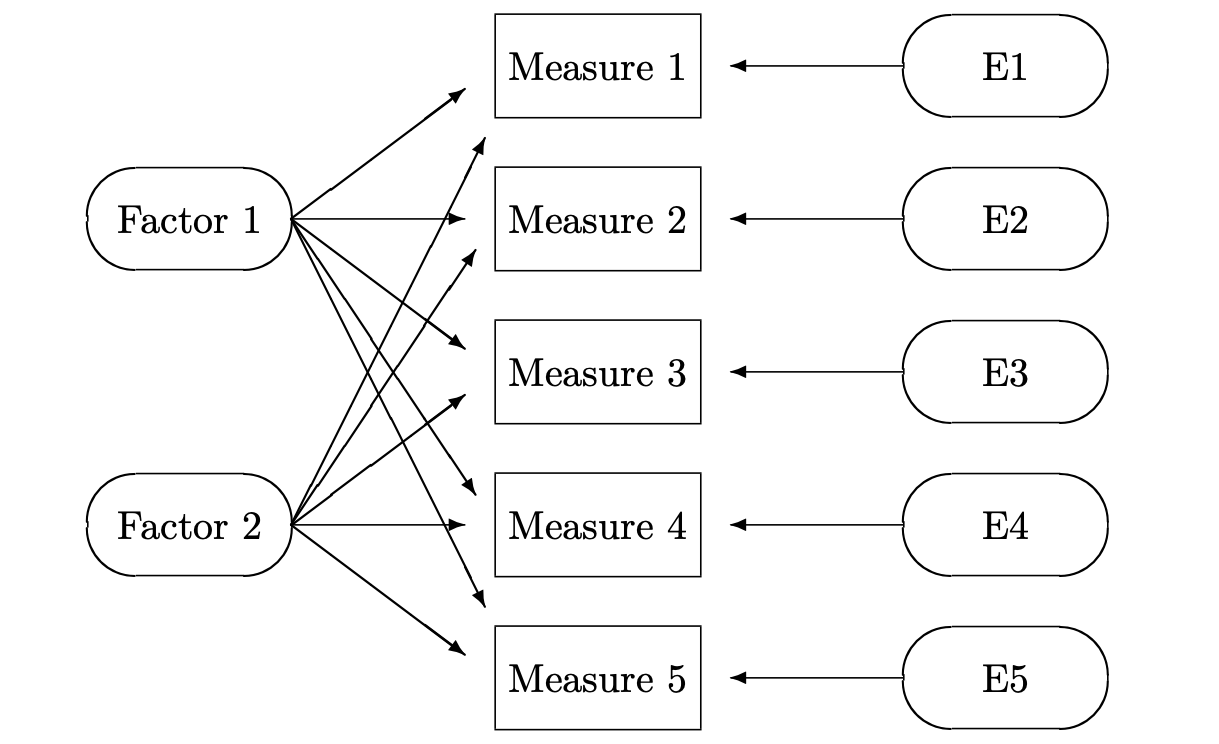

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [ ]:
#read data

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,Number,M-F,Ave_Age,Prev_Ed,Ave_Exp,Ave_Fear,Hint,Ans,Plague,Progress,Victory
0,4,0.00,26.75,16,0.50,62.50,6,2,0,87,0
1,5,0.20,31.20,16,1.40,77.00,7,4,0,82,0
2,7,1.00,18.71,12,2.57,80.71,10,3,0,81,0
3,7,0.14,21.86,16,2.14,45.00,6,2,0,102,1
4,5,0.20,26.80,21,3.60,66.00,3,0,0,111,1


Train-Test Split

In [ ]:
features = df.values[:,:9]
target = df.values[:,10:]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.2)

KMO Test (هر چقدر این مقدار به 1 نزدیکتر باشد، بیانگر عامل پذیری بیشتر داده ها است)

In [ ]:
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.6438083580857441

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation = None, impute = "drop", n_factors=df.shape[1])
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.01227221, 1.73781803, 1.40730539, 1.16153109, 0.95362464,
       0.81360146, 0.68651886, 0.50954931, 0.33960014, 0.19994147,
       0.1782374 ])

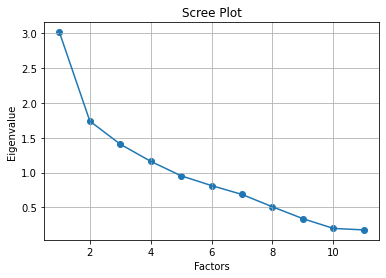

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [24]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df)

print(pd.DataFrame(fa.loadings_,index=df.columns))

                 0         1         2         3         4
Number    0.019698  0.046976  0.044140 -0.113995 -0.194694
M-F       0.003825 -0.052886 -0.014586 -0.049235  0.679383
Ave_Age   0.092861  0.768651 -0.173881 -0.027706 -0.030716
Prev_Ed   0.232428  0.853188 -0.252789 -0.093791 -0.063152
Ave_Exp   0.664608 -0.041214 -0.147468 -0.018744  0.075401
Ave_Fear -0.114991 -0.038195 -0.027265 -0.000557 -0.259796
Hint     -0.057031 -0.203727  0.667290 -0.126124 -0.011558
Ans       0.015659 -0.117772  0.642316 -0.071104 -0.024271
Plague    0.321814 -0.101813 -0.271152  0.897623  0.075048
Progress  0.792919  0.330455  0.148259  0.244976  0.130635
Victory   0.855590  0.242340  0.021598  0.182631  0.026591


In [25]:
# The amount of variance explained by each factor can be found out
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4
Variance,1.985792,1.560585,1.072604,0.945393,0.601706
Proportional Var,0.180527,0.141871,0.097509,0.085945,0.054701
Cumulative Var,0.180527,0.322398,0.419907,0.505852,0.560553


In [27]:
# Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities'])

,Communalities
Number,0.055444
M-F,0.467010
Ave_Age,0.631393
Prev_Ed,0.858641
Ave_Exp,0.471186
Ave_Fear,0.082920
Hint,0.506074
Ans,0.432330
Plague,0.998813
Progress,0.836981
